In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: kevin velasquez gonzalez
*Métodos computacionales*

---

In [13]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, tplquad, fixed_quad, simpson




#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






/tmp/ipython-input-14-3877436498.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  trap1 = np.trapz(y1, x1)
/tmp/ipython-input-14-3877436498.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  trap2 = np.trapz(y2, x2)


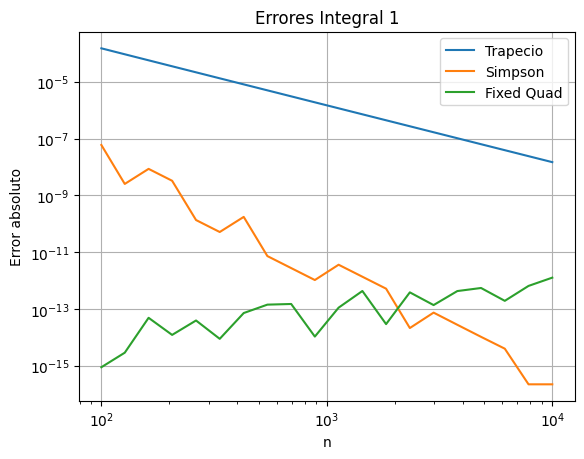

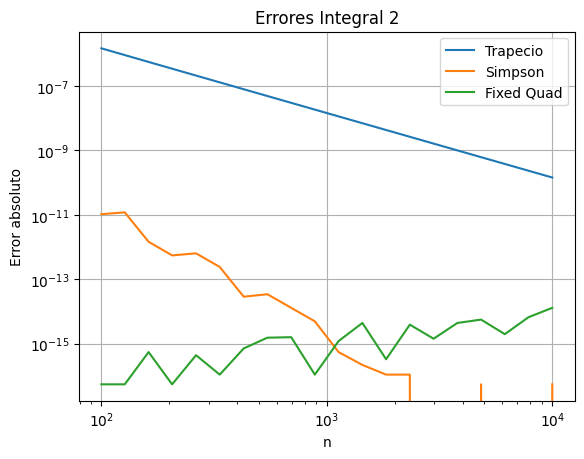

In [14]:
# Primera integral
def f1(x):
    return np.exp(3*x) * np.sin(x)

# Segunda integral
def f2(x):
    return 1 / (x * np.log(x))

# Limites
a1, b1 = 0, np.pi/4
a2, b2 = np.e, np.e + 1

# Valor exacto usando quad
exacto1, _ = quad(f1, a1, b1)
exacto2, _ = quad(f2, a2, b2)

# Valores de n
n_vals = np.logspace(2, 4, 20, dtype=int)

# Listas para errores
errores_trap1 = []
errores_simp1 = []
errores_fixed1 = []

errores_trap2 = []
errores_simp2 = []
errores_fixed2 = []

# Bucle para evaluar integrales
for n in n_vals:
    # Primera integral
    x1 = np.linspace(a1, b1, n)
    y1 = f1(x1)

    trap1 = np.trapz(y1, x1)
    simp1 = simpson(y1, x1)
    fixed1, _ = fixed_quad(f1, a1, b1, n=n)

    errores_trap1.append(abs(trap1 - exacto1))
    errores_simp1.append(abs(simp1 - exacto1))
    errores_fixed1.append(abs(fixed1 - exacto1))

    # Segunda integral
    x2 = np.linspace(a2, b2, n)
    y2 = f2(x2)

    trap2 = np.trapz(y2, x2)
    simp2 = simpson(y2, x2)
    fixed2, _ = fixed_quad(f2, a2, b2, n=n)

    errores_trap2.append(abs(trap2 - exacto2))
    errores_simp2.append(abs(simp2 - exacto2))
    errores_fixed2.append(abs(fixed2 - exacto2))

# Graficas
plt.loglog(n_vals, errores_trap1, label='Trapecio')
plt.loglog(n_vals, errores_simp1, label='Simpson')
plt.loglog(n_vals, errores_fixed1, label='Fixed Quad')
plt.xlabel('n')
plt.ylabel('Error absoluto')
plt.title('Errores Integral 1')
plt.grid()
plt.legend()
plt.show()

plt.loglog(n_vals, errores_trap2, label='Trapecio')
plt.loglog(n_vals, errores_simp2, label='Simpson')
plt.loglog(n_vals, errores_fixed2, label='Fixed Quad')
plt.xlabel('n')
plt.ylabel('Error absoluto')
plt.title('Errores Integral 2')
plt.grid()
plt.legend()
plt.show()

#Para funciones suaves y continuas, fixed_quad es buena opción, si buscamos precisión alta con pocos puntos.

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [15]:
#Método con quad
def integral_z(z, y):
    return (1/y) * np.sin(z/y)

def integral_y(y, x):
    return quad(integral_z, 0, x*y, args=(y,))[0]

def integrand_x(x):
    return quad(integral_y, 0, x, args=(x,))[0]

resultado_quad, error_quad = quad(integrand_x, 0, np.pi)

#Método con tplquad
def f(z, y, x):
    return (1/y) * np.sin(z/y)

z_lower = lambda y, x: 0
z_upper = lambda y, x: x * y
y_lower = lambda x: 0
y_upper = lambda x: x

resultado_tplquad, error_tplquad = tplquad(f, 0, np.pi, y_lower, y_upper, z_lower, z_upper)

#Resultados
print("Resultado con quad:    ", resultado_quad)
print("Error con quad:        ", error_quad)
print("Resultado con tplquad: ", resultado_tplquad)
print("Error con tplquad:     ", error_tplquad)


Resultado con quad:     6.934802200544679
Error con quad:         7.699177074265904e-14
Resultado con tplquad:  6.934802200544679
Error con tplquad:      7.699177074265904e-14


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [27]:
import numpy as np
from numpy.polynomial.legendre import leggauss

def gauss_quad_standard(func, a, b, n):
    x, w = leggauss(n)
    t = 0.5 * (b - a) * x + 0.5 * (b + a)
    return 0.5 * (b - a) * np.sum(w * func(t))

def triple_integral(n):
    def fz(z, y): return (1/y) * np.sin(z/y)
    def fy(y, x): return gauss_quad_standard(lambda z: fz(z, y), 0, x*y, n)
    def fx(x): return gauss_quad_standard(lambda y: fy(y, x), 0, x, n)
    return gauss_quad_standard(fx, 0, np.pi, n)

resultado = triple_integral(60)  # o más

print("Resultado:", resultado)

#gaussno puede manejar bien la singularidad y=0

Resultado: 9.107331966336778


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [19]:
import numpy as np
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, dblquad

#INTEGRAL 1
f1 = lambda x: 1 / np.sqrt(np.tan(x))
a1, b1 = 0, np.pi / 2
x1 = np.linspace(a1 + 1e-8, b1 - 1e-8, 10000)
print("Integral 1:")
print(" Trapezoidal:", trapezoid(f1(x1), x1))
print(" Simpson:    ", simpson(f1(x1), x1))
print(" Gauss:      ", fixed_quad(f1, a1 + 1e-8, b1 - 1e-8, n=100)[0])
print()

#INTEGRAL 2
f2 = lambda x: np.cos(x) / x**3
a2, b2 = 1, 100
x2 = np.linspace(a2, b2, 100000)
y2 = f2(x2)
print("Integral 2:")
print(" Trapezoidal:", trapezoid(y2, x2))
print(" Simpson:    ", simpson(y2, x2))
print(" Gauss:      ", fixed_quad(f2, a2, b2, n=100)[0])
print()

#INTEGRAL 3
Nx, Ny = 300, 300
x3 = np.linspace(0, np.pi/4, Nx)
y3 = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x3, y3, indexing='ij')
mask = Y <= np.sin(X)
f3 = np.zeros_like(X)
f3[mask] = 1 / np.sqrt(1 - Y[mask]**2)
dx = x3[1] - x3[0]
dy = y3[1] - y3[0]

# Gauss (doble)
f_gauss = lambda y, x: 1 / np.sqrt(1 - y**2)
ymin = lambda x: 0
ymax = lambda x: np.sin(x)
gauss3 = dblquad(f_gauss, 0, np.pi/4, ymin, ymax, epsabs=1e-5)[0]

print("Integral 3:")
print(" Trapezoidal:", np.sum(f3 * mask) * dx * dy)
print(" Simpson:    ", simpson(simpson(f3 * mask, y3), x3))
print(" Gauss:      ", gauss3)

#Simpson y Trapezoidal no funcionan bien en infinito están hechos para intervalos finitos ademas funcionan en mallas rectangulares, no con límites variables sin hacer algo especial.

Integral 1:
 Trapezoidal: 2.9886129818672855
 Simpson:     2.729314706360481
 Gauss:       2.210582215185931

Integral 2:
 Trapezoidal: 0.018117291521448458
 Simpson:     0.01811709040305197
 Gauss:       0.018117090402837016

Integral 3:
 Trapezoidal: 0.31076199890047007
 Simpson:     0.30838814244144047
 Gauss:       0.30842513753404244
